### Importing the data

In [1]:
# Importing necessary libraries

from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')
#Numerical Libraries
import numpy as np

# to handle data in form of rows and columns
import pandas as pd

## To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Sklearn package's data splitting function 

from sklearn.model_selection import train_test_split


#sklearn package for support vector machine
from sklearn import svm

#sklearn package for confusion matrix
from sklearn.metrics import accuracy_score

#sklearn package for gridsearchcv
from sklearn.model_selection import GridSearchCV

#sklearn package for scaling
from sklearn.preprocessing import StandardScaler


In [3]:
##load the dataset
original_data = pd.read_csv("churn.csv")

### Understanding the data

In [4]:
#let's have a look of first few rows
original_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Number of rows and coulmns
original_data.shape

(7043, 21)

In [6]:
#five pont summary by using describe function
original_data.describe(include = 'all' ).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,8099-MZPUJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#let's have a look on datatypes of each varible
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

**Outcome- Except the 'senior citizen' ,'tenure','monthly charges',all the varibles are of object type.**

In [10]:
#checking the values of the target column.
original_data["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
#Let's check the number of bus ,car and van in the variable class
original_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
#checking the prescence of missingvalues
original_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**No missing values exist**

### Data Manipulation

**Checking the presence of outliers by using boxplot**

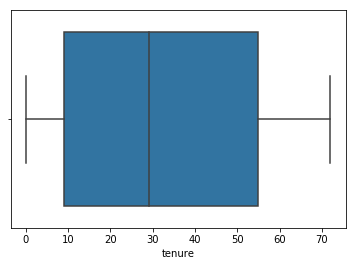

In [18]:
### 5-point summary of customer id
sns.boxplot(original_data['tenure'])

**Outcome - The distribution looks a near normal distribution ,No outlier exist**

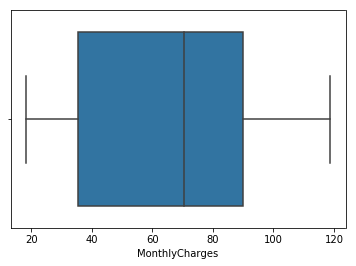

In [19]:
### 5-point summary of customer id
sns.boxplot(original_data['MonthlyCharges'])

**Outcome - Distribution is close to normal distribution,No outlier  exists.**

**checking the values in the individual categorical column.**

In [45]:
##dropping the columns customerID
original_data.drop(columns = ["customerID"], inplace = True)
original_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [21]:
original_data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
original_data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [25]:
original_data["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
original_data["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
original_data["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
original_data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [32]:
original_data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
original_data["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
original_data["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [35]:
original_data["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [36]:
original_data["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
original_data["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
original_data["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
original_data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [41]:
original_data["PaperlessBilling"].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
original_data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [44]:
original_data["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [70]:
#imputing missing values with the median  of the column total charges

original_data['TotalCharges'] = original_data['TotalCharges'].fillna(original_data['TotalCharges'].mode().iloc[0])



In [72]:
#original_data['TotalCharges'] = original_data['TotalCharges'].astype('float64')


In [67]:
original_data['TotalCharges'].isnull().any()

False

### Data Visualization

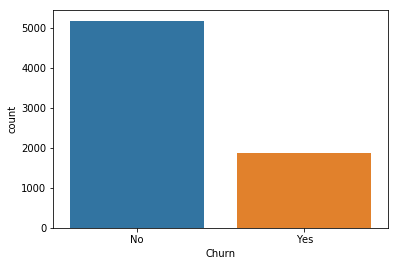

In [74]:
##target variable distribution 
sns.countplot(x=original_data['Churn'])

**The above plot shows an imbalance in the class distribution in the dataset. While 'No' represents the presence of non churn, 'yes' represents the absense of churn.


**A “churn” with respect to the Telecom industry, is defined as the percentage of subscribers moving from a specific service or a service provider to another in a given period of time**

**In the case at hand, class '**yes**' **is to be considered the class of interest because the objective is to successfully identify a potential 'churners' customer. Hence a type 2 error (False Negative) is highly undeasirable** 

**On the other hand, in this case, a Type 1 error (FP) is tolerable as it would only lead to providing extra attention to the person or even identify if the person as a border case.

**Hence the class imbalance in favour of class 'yes' in this case is not entirely undesirable as it could help reduce Type 2 errors(FN) but at the expense of increased Type 1 errors(FP). The less number of observations available for training also supports this approach.

### **Applying Label Encoder to the Categorical variable**

In [77]:
#choosing only the categorical column
                                  

df2 = original_data.select_dtypes(exclude="number")
c = df2.columns ##choosing only the categorical variable columns

In [78]:
#importing Labelencoder from sklearn

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [99]:
##encoding is done on the slice containing non-numerical columns of the main dataframe 

le = LabelEncoder()
original_data[c] = original_data[c].apply(le.fit_transform)
original_data[c].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


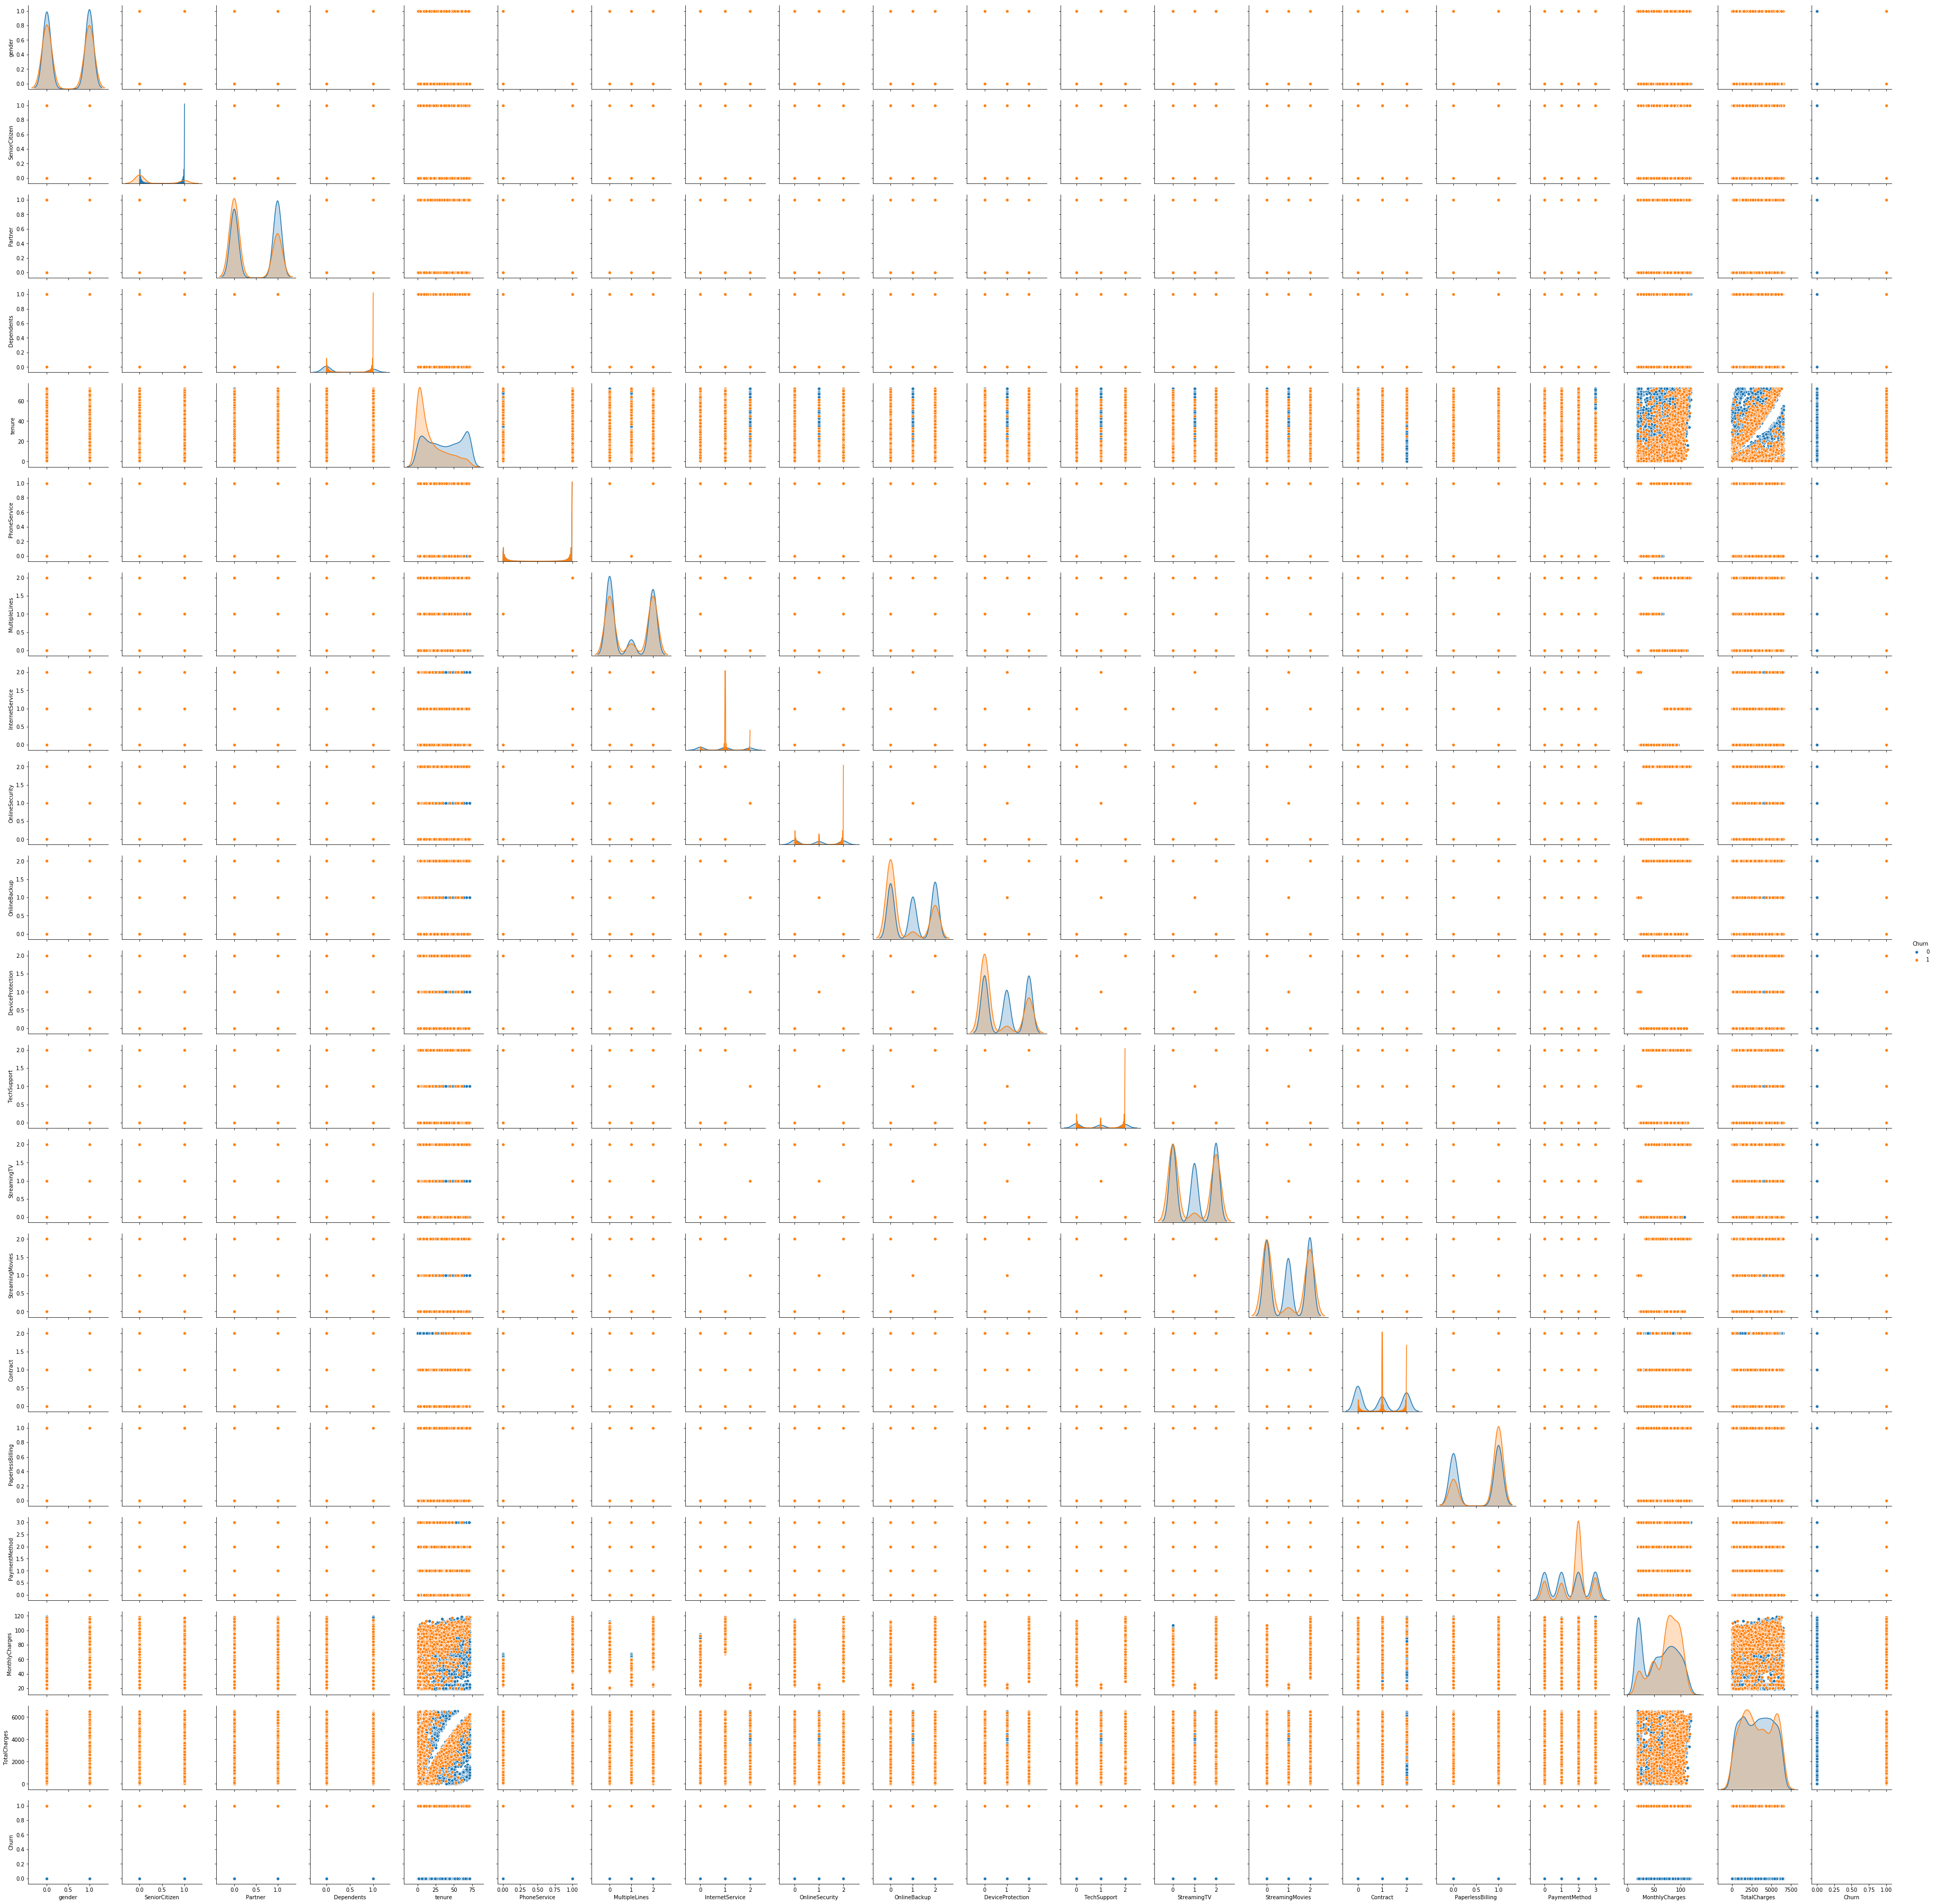

In [100]:
#One more multivariate analysis,here pairplot is used.

sns.pairplot(original_data,hue = 'Churn',diag_kind ='kde')

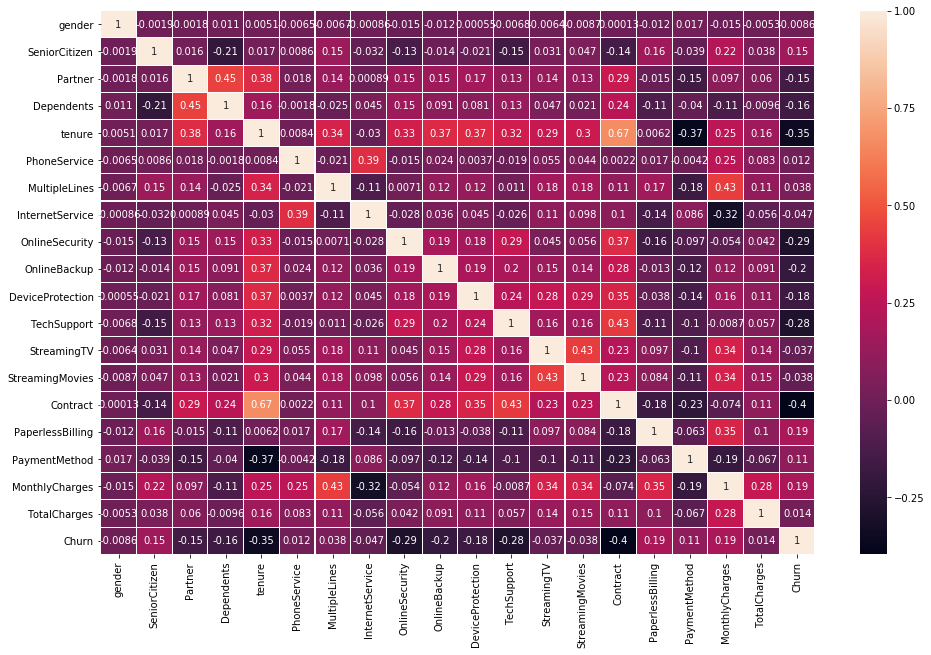

In [85]:
#correlation Matrix and Heatmap applied on the dataframe which contain target variable as well

corr = original_data.corr()
fig = plt.figure(figsize=(16,10))
sns.heatmap(original_data.corr(),annot=True,linewidths=.10)
plt.show()

In [102]:
#copy all predictors variables to dataframe a ,since churn is dependent variable(target) drop it. 
a = original_data.drop('Churn',axis = 1)

#copy the 'churn'column to dataframe b. This is the target column
b = original_data['Churn']

In [103]:
from sklearn.linear_model import LassoCV


In [104]:
reg = LassoCV()
reg.fit(a, b)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(a,b))
coef = pd.Series(reg.coef_, index = a.columns)

Best alpha using built-in LassoCV: 0.012073
Best score using built-in LassoCV: 0.252042


Text(0.5, 1.0, 'Feature importance using Lasso Model')

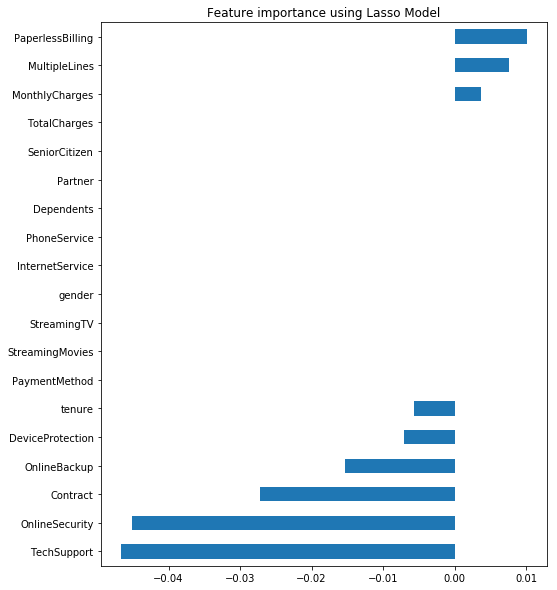

In [105]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [106]:
#tabulation of data of 'gender ' and target column.
pd.crosstab(original_data['gender'],original_data['Churn'])

Churn,0,1
gender,,
0,2549,939
1,2625,930


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAFF0965C0>,
      dtype=object)

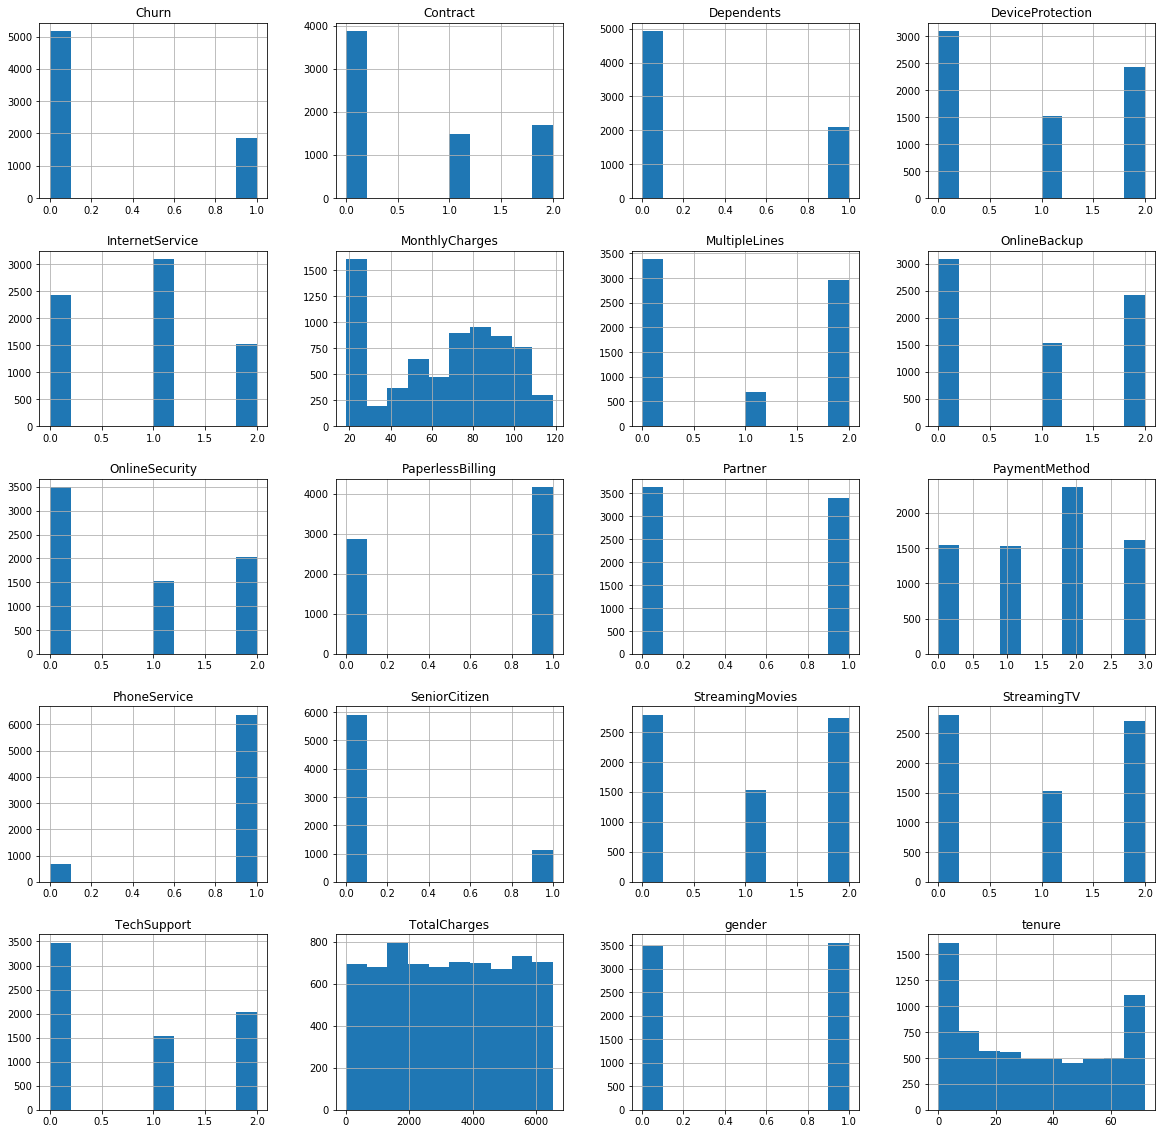

In [107]:
original_data.hist(figsize=(20,20))

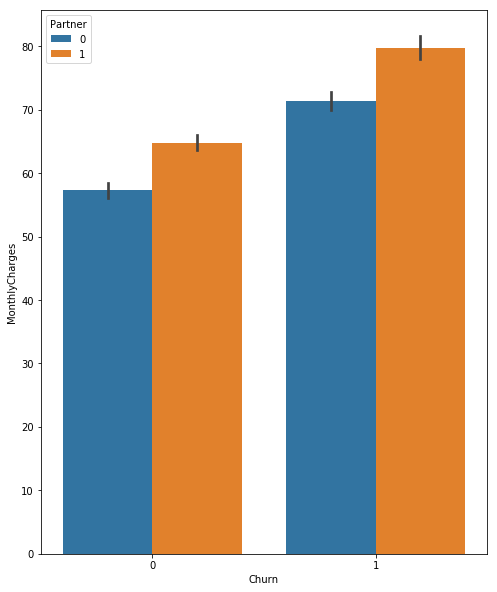

In [109]:
x = original_data['MonthlyCharges']
sns.barplot(original_data['Churn'],x,original_data['Partner'])

### Implement Machine Learning Models

In [111]:
##Separating the independent & target variables
X = original_data.drop(columns="Churn")
Y = original_data["Churn"]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#Splitting data into training and test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## **LOGISITIC REGRESSION**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [115]:
import warnings 
warnings.filterwarnings('ignore')

In [116]:
##declaring logistic regression algoritm
logmodel = LogisticRegression()

In [117]:
score1 = 'accuracy'

In [118]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [119]:
##performing GridSearch CV for hyperparameter tuning and model assessment
logmodel_cv = GridSearchCV(logmodel, grid, cv=10, n_jobs=1, scoring = score1)

##fitting training data on the optimum model returned by GridSearch CV
logmodel_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
##printing the optimum values of hyperparameters after the tuning process
print("tuned hpyerparameters :(best parameters) ",logmodel_cv.best_params_)

##printing the mean cross validated score of the best estimator 
print("accuracy :",logmodel_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.801419878296146


In [121]:
##printing the predicted values for the testing set
predictions = logmodel_cv.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

#### Model Evaluation:

In [124]:
##printing classification report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

   micro avg       0.81      0.81      0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



In [125]:
##printing the confusion matrix
confusion_matrix(Y_test,predictions)

array([[1407,  178],
       [ 225,  303]], dtype=int64)

In [126]:
accuracy_score(Y_test, predictions)

0.8092759110269758

## K NearestNeighbour :**

In [128]:
from scipy.stats import zscore

In [129]:
##scaling the independent variables
X_train_scaled = zscore(X_train)
X_test_scaled = zscore(X_test)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
##declaring KNN algoritm
neigh = KNeighborsClassifier()

In [132]:
score2 = 'accuracy'

In [133]:
grid={"n_neighbors":[3,5,7,9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

In [134]:
##performing GridSearch CV for hyperparameter tuning and model assessment
neigh_cv = GridSearchCV(neigh, grid, cv=10, n_jobs=1, scoring = score2)

##fitting training data on the optimum model returned by GridSearch CV
neigh_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [135]:
##printing the optimum values of hyperparameters after the tuning process
print("tuned hpyerparameters :(best parameters) ",neigh_cv.best_params_)

##printing the mean cross validated score of the best estimator 
print("accuracy :",neigh_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
accuracy : 0.7614604462474645


**Model Evaluation:**

In [138]:
##printing the predicted values for the testing set
pred = neigh_cv.predict(X_test_scaled)

In [139]:
##printing the confusion matrix
confusion_matrix(Y_test, pred)

array([[1343,  242],
       [ 222,  306]], dtype=int64)

In [140]:
##printing classification report
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1585
           1       0.56      0.58      0.57       528

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.71      0.71      0.71      2113
weighted avg       0.78      0.78      0.78      2113



In [141]:
##printing accuracy score
accuracy_score(Y_test, pred)

0.780407004259347

## Naïve Bayes:

In [142]:
from sklearn.naive_bayes import GaussianNB

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
##declaring the Naive Bayes alogrithm
gaussmod = GaussianNB()

In [146]:
##finding the cross validated score for the dataset for a 10 fold CV
score3 = 'accuracy'
results_cv = cross_val_score(gaussmod.fit(X,Y), X, Y, cv=10, scoring = score3)
print("Accuracy is %0.3f" %(results_cv.mean()))

Accuracy is 0.756


In [148]:
##printing the predicted values for the testing set
predicted = gaussmod.predict(X_test)

In [149]:
##printing classification report
print(classification_report(Y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.52      0.76      0.62       528

   micro avg       0.76      0.76      0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.81      0.76      0.78      2113



In [150]:
##printing the confusion matrix
confusion_matrix(Y_test,predicted)

array([[1212,  373],
       [ 125,  403]], dtype=int64)

Outcome - When type 1 error(FP) is costly, then we focus on the precision metric and choose the model which gives higher precision value for the class in question.

If type 2 error (FN) is costlier, then we focus on the recall metric and choose the model with higher recall value.

In our case, class 1(yes) being the desired output for the organisation, 1 can be considered the positive result.

Hence a type 2 error (FN) would mean losing a potential customer owing to incorrect prediction (incorrectly classifying as 0 when it should have been 1, in the test set). 

Therefore we choose that model which gives a better recall value for class 1.

Considering the same scenario as above where our desired result is class 1 (postive), if the recall values for two models are similar, then we go on to compare the precision metric. In such an event, the model with the higher precision metric is to be considered a better performing model. 

In this problem, in view of all the above, the Logistic Regression model performs better than the KNN model in terms of recall value. The Logistic Regression model also performs better than the Naive Bayes' model in terms of similar recall value but superior precison value. 

Logistic regression performs better when the actual decision boundaries are linear. The dataset in this case clearly has linear decision boundaries as evident from the results. 